In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("income_evaluation.csv",na_values=[" ?"])

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#Looking for missing data
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
#Filling missing categoritcal values with mode
for i in data.select_dtypes(include='O').columns:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [7]:
#Making sure they are filled
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
#Dropping unnecessary data
data.drop(["capital-gain","capital-loss","fnlwgt","relationship"],axis=1,inplace=True)

In [9]:
#Making sure they are gone
data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


In [10]:
#Stripping spaces from data
for i in data.select_dtypes(exclude='number').columns:
    data[i]=data[i].apply(lambda x : x.strip())

In [11]:
#age, education-num, and hours-per-week are the only columns with numerical data left
data.select_dtypes(include='number').columns

Index(['age', 'education-num', 'hours-per-week'], dtype='object')

In [12]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':[14,8]}, font_scale=1.2)

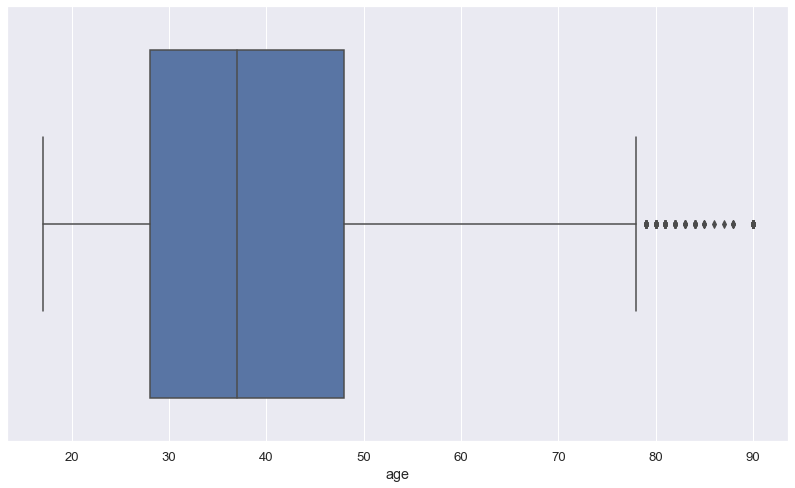

In [13]:
#Detecting outliers in age column
sns.boxplot(data["age"])

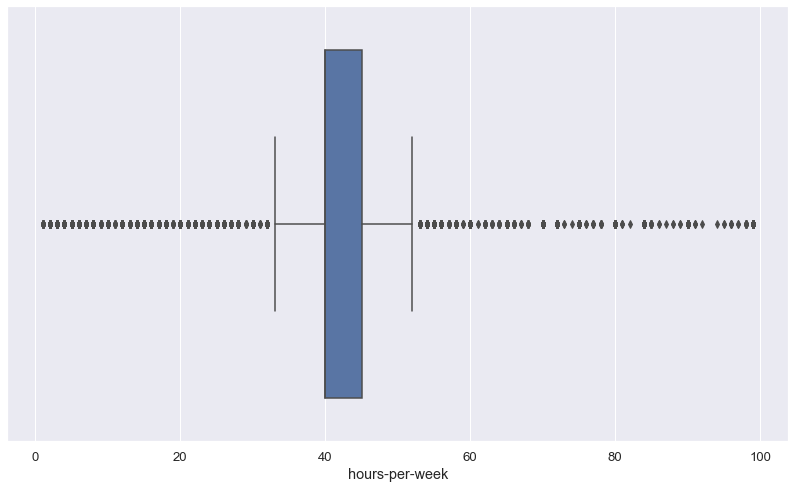

In [14]:
#Detecting outliers in hours-per-week column
sns.boxplot(data["hours-per-week"])

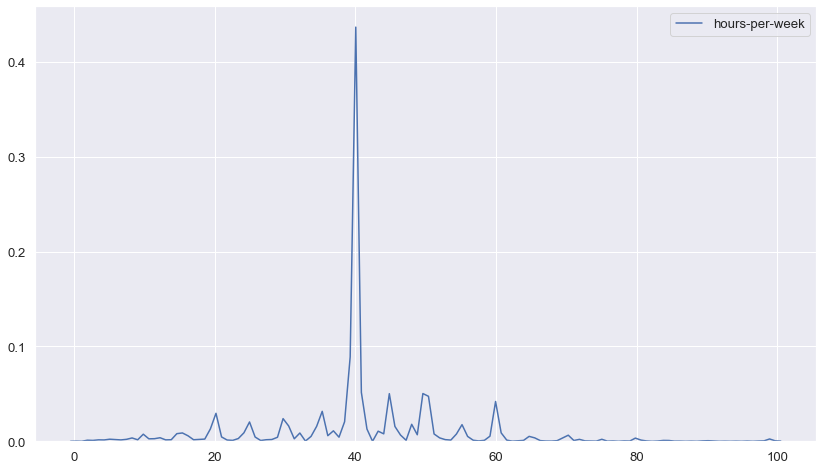

In [15]:
#Since hours-per-week has a lot of outliers, let's check it's distribution to see if it makes sense
#It's normally distributed, it shows that most people work 40 hours per week, which is normal, so it makes sense that 
#almost 38% of the data is outliers.
sns.kdeplot(data["hours-per-week"])

In [16]:
#Let's replace outliers with median using the interquartile range formula.
Q1 = data.quantile(.25)
Q3 = data.quantile(.75)
IQR = Q3-Q1

In [17]:
data.loc[(data["hours-per-week"]<(Q1["hours-per-week"]-1.5*IQR["hours-per-week"]))
         |(data["hours-per-week"]>(Q3["hours-per-week"]+1.5*IQR["hours-per-week"])),"hours-per-week"].count()

9008

In [18]:
for col in data.select_dtypes(include='number').columns:
    data.loc[(data[col]<(Q1[col]-1.5*IQR[col]))|(data[col]>(Q3[col]+1.5*IQR[col])),col]=data[col].median()

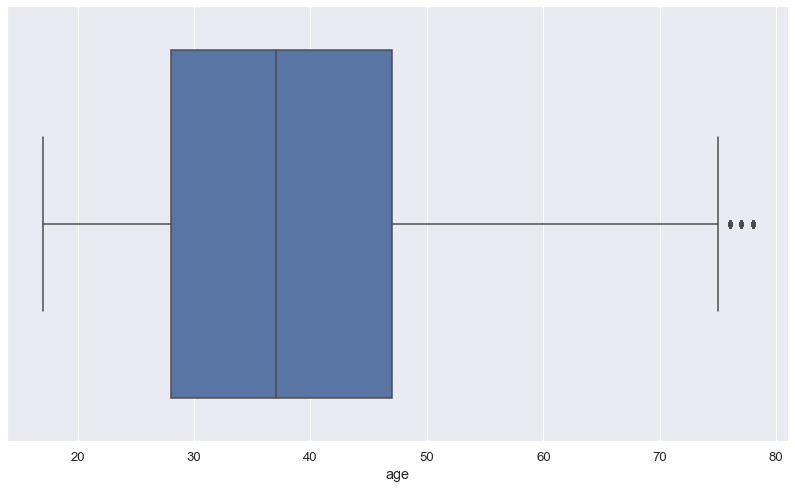

In [19]:
#Making sure outliers are replaced
sns.boxplot(data["age"])

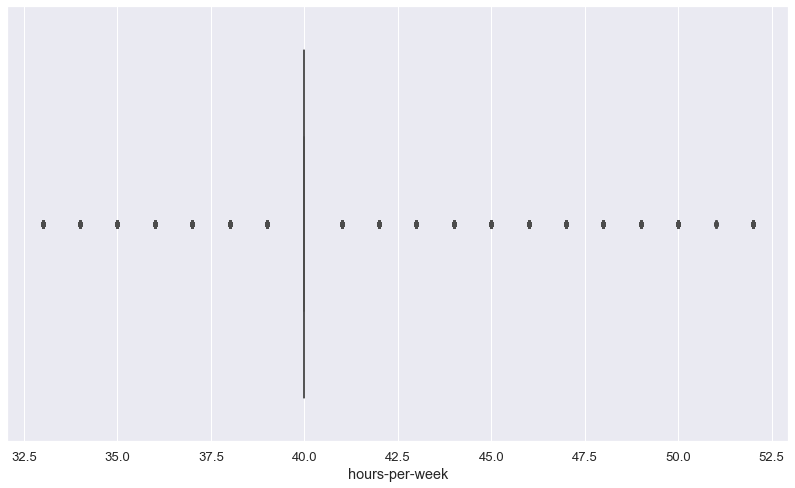

In [20]:
sns.boxplot(data["hours-per-week"])

# The data is clean, we are ready now for some visualization!

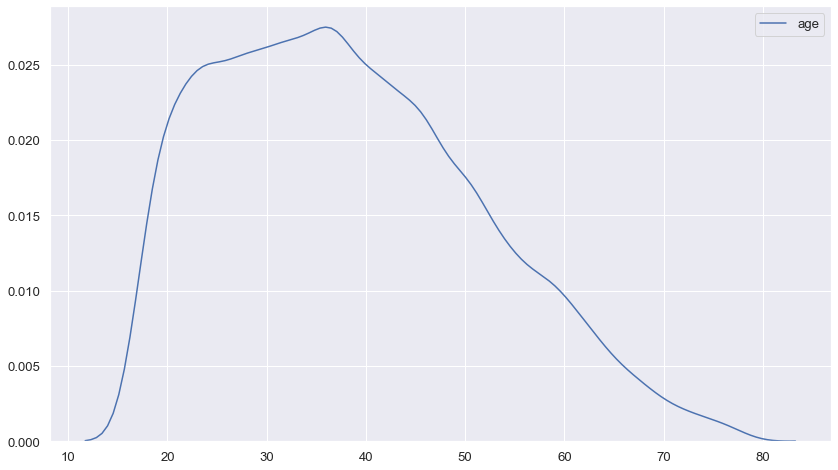

In [21]:
#age distribution: this is a positive skew, because the mean is not equal to the median
sns.kdeplot(data["age"])

In [22]:
# 37 is the most repeated age
data["age"].mode()

0    37.0
dtype: float64

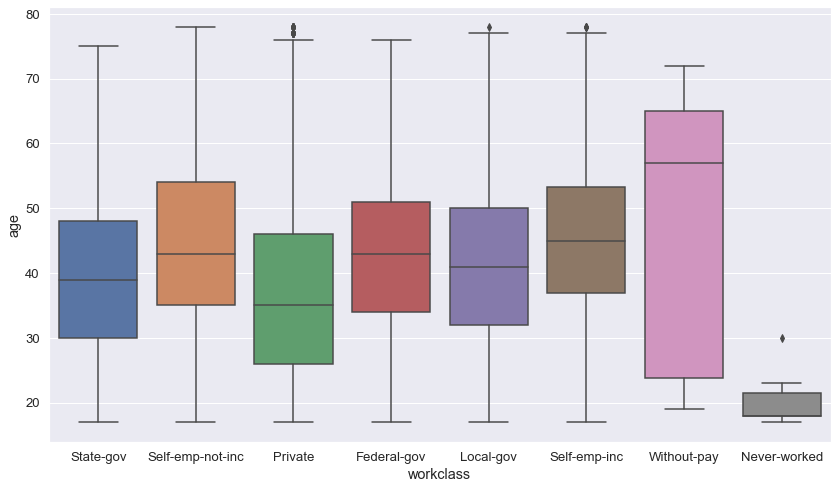

In [23]:
#Looks like a wide range of ages without-pay and the most of them are in their 50s, because the "mean" is there
#People who never worked before are between 17 and 23
sns.boxplot(x="workclass",y="age",data=data)

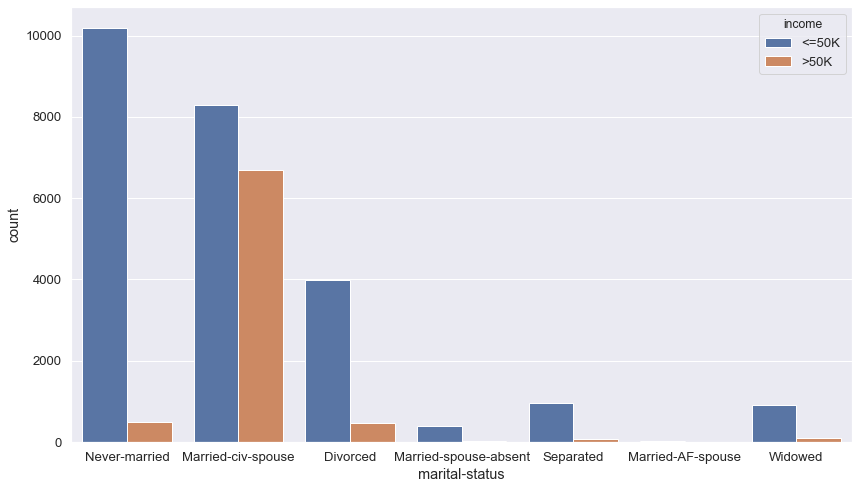

In [24]:
#Most of the people who make more than 50k are married
#Most of divorced and never-married people make equal or less than 50k
#In conclusion, if you don't make a lot of money, you will end up alone. But don't worry
#there is more to life than relationships
sns.countplot(x="marital-status",hue="income",data=data)

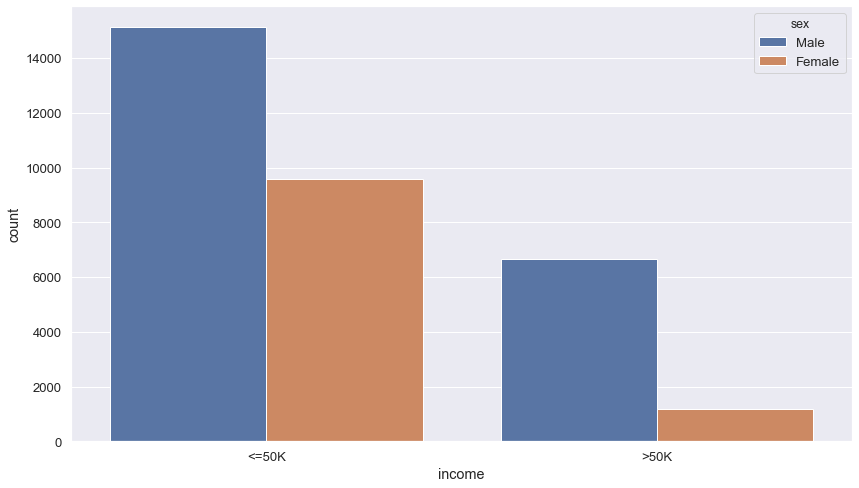

In [25]:
#More males make more money in both cases (above or under 50k)
#But when it comes to the over 50k category, males are way superior to women in terms of numbers
#In conclusion: males take their career more seriously, to make a lot of money and thus, not end up alone like the graph above.
sns.countplot(x="income",hue="sex",data=data)

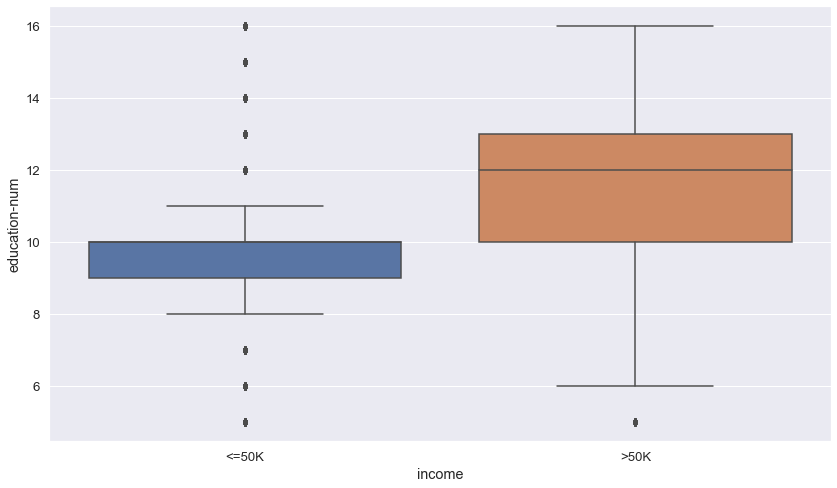

In [26]:
#This graph proves that the higher the education the more money you make.
sns.boxplot(x="income",y="education-num",data=data)

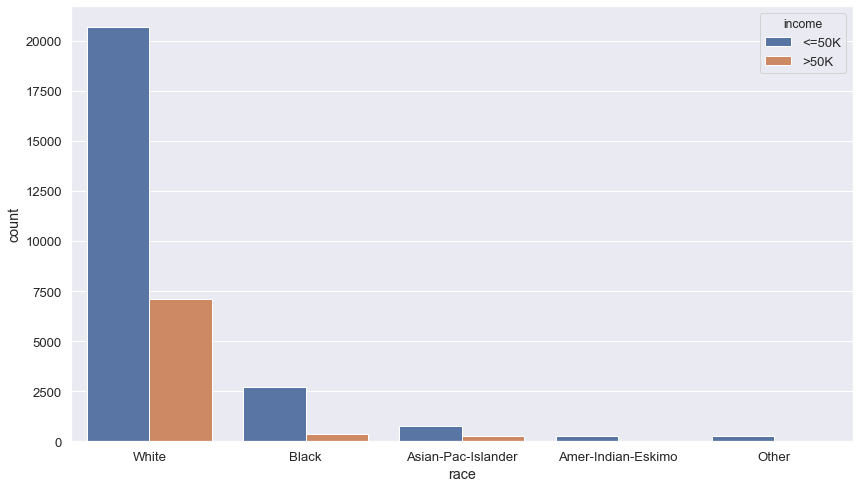

In [27]:
#White people have most of the jobs, and the gap between less and more than 50k is the smallest among other races
#In conclusion, white people make more money than the other races.
sns.countplot(x="race",hue="income",data=data)

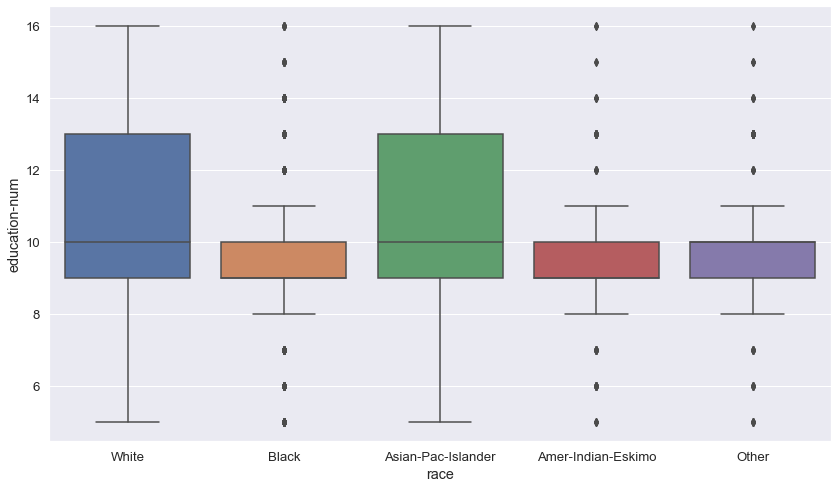

In [28]:
#White people and Asians have the highest education level of all, and they are almost equal in terms of education.
sns.boxplot(x="race",y="education-num",data=data)

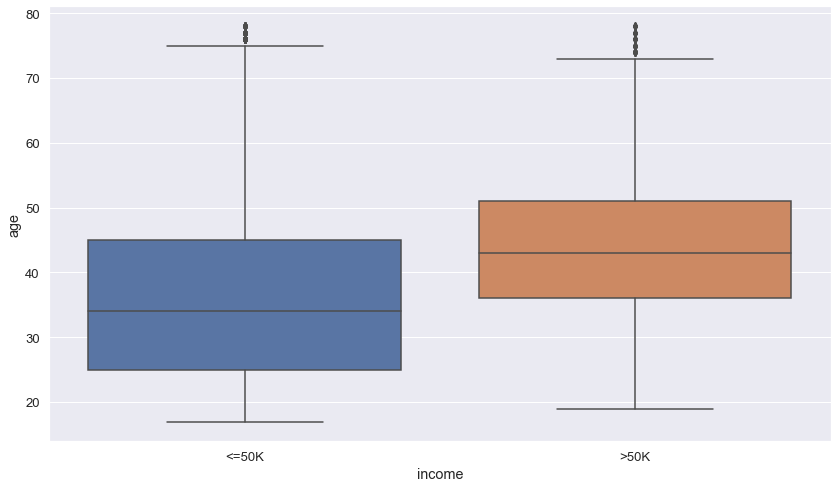

In [29]:
#The older you are, the more money you make.
sns.boxplot(x="income",y="age",data=data)

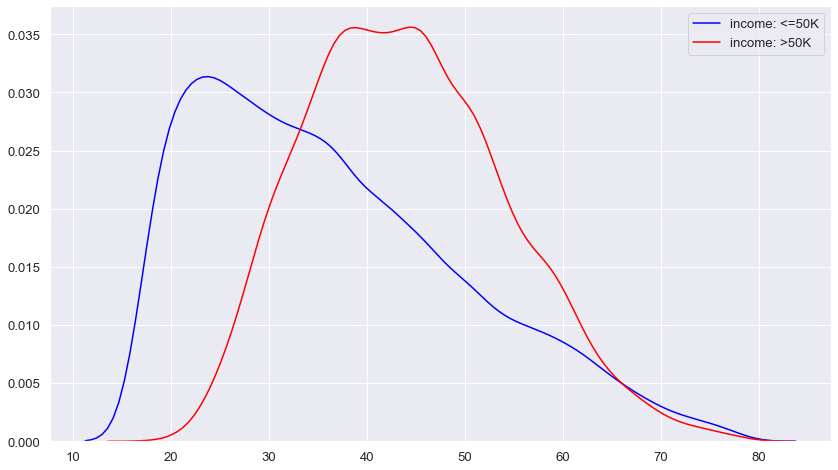

In [30]:
#This also shows us that most people that make less than or equal 50K are young, and their number decrease as they age.(+ skew)
#People who make more than 50k, most of them are middle aged. (normally distributed)
sns.kdeplot(data[data["income"]=='<=50K']["age"],color='blue',label='income: <=50K')
sns.kdeplot(data[data["income"]=='>50K']["age"],color='red',label='income: >50K')

In [31]:
#No need for education-num after visualization, we have education for training, so let's just drop it.
data.drop("education-num",axis=1,inplace=True)

In [32]:
data.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,40.0,United-States,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40.0,United-States,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40.0,United-States,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40.0,Cuba,<=50K


In [33]:
data2=data.copy()

# Data scaling and label encoding

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
data.select_dtypes(include='number').columns

Index(['age', 'hours-per-week'], dtype='object')

In [36]:
sc = StandardScaler()
data[["age","hours-per-week"]]=sc.fit_transform(data[["age","hours-per-week"]])

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
for i in data.columns:
    if data[i].dtype=='O':
        lb=LabelEncoder()
        data[i]=lb.fit_transform(data[i])

# Data Spliting

In [39]:
X=data.drop("income",axis=1)
y=data["income"]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

# Trying different models

In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression(max_iter = 22792)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [44]:
lr.score(X_test,y_test)

0.7558603746545194

In [45]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [47]:
rf.score(X_test, y_test) #Random Forest gets the best accuracy for this data

0.8093970723717883

In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [50]:
dt.score(X_test,y_test)

0.7776640393080152

In [51]:
#Support Vector Machines
from sklearn.svm import SVC

In [52]:
sv = SVC()
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

In [53]:
sv.score(X_test,y_test)

0.7593407718292559

In [54]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [55]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)

In [56]:
kn.score(X_test,y_test)

0.8041764766096837

# Resampling

In [57]:
training_data=pd.concat([X_train,y_train],axis=1)

In [58]:
from sklearn.utils import resample

In [59]:
less_than_50=training_data[training_data["income"]==0]
more_than_50=training_data[training_data["income"]==1]

# Upsampling:

In [60]:
more_than_50_upsampled=resample(more_than_50,n_samples=len(less_than_50))

In [61]:
#Upsamling works
upsampled=pd.concat([less_than_50,more_than_50_upsampled])
upsampled["income"].value_counts()

1    17302
0    17302
Name: income, dtype: int64

In [62]:
X_train_upsampled = upsampled.drop("income",axis=1)
y_train_upsampled = upsampled["income"]

# Downsampling:

In [63]:
less_than_50_downsampled=resample(less_than_50,n_samples=len(more_than_50))

In [64]:
#Downsampling works
downsampled=pd.concat([more_than_50,less_than_50_downsampled])
downsampled["income"].value_counts()

1    5490
0    5490
Name: income, dtype: int64

In [65]:
X_train_downsampled = upsampled.drop("income",axis=1)
y_train_downsampled = upsampled["income"]

# Logistic Regression after upsampling

In [66]:
lr_upsampled=LogisticRegression(max_iter=22792)
lr_upsampled.fit(X_train_upsampled,y_train_upsampled)
lr_upsampled_pred=lr_upsampled.predict(X_test)

In [67]:
#Worse
lr_upsampled.score(X_test,y_test)

0.6807247415293275

# Logistic Rergression after downsampling

In [68]:
lr_downsampled=LogisticRegression(max_iter=22792)
lr_downsampled.fit(X_train_downsampled,y_train_downsampled)
lr_downsampled_pred=lr_downsampled.predict(X_test)

In [69]:
#Worse
lr_downsampled.score(X_test,y_test)

0.6807247415293275

# Random Forest after upsampling

In [70]:
rf_upsampled=RandomForestClassifier()
rf_upsampled.fit(X_train_upsampled,y_train_upsampled)
rf_upsampled_pred=rf_upsampled.predict(X_test)

In [71]:
#Worse
rf_upsampled.score(X_test, y_test)

0.7973180468829972

# Random Forest after downsampling

In [72]:
rf_downsampled=RandomForestClassifier()
rf_downsampled.fit(X_train_downsampled,y_train_downsampled)
rf_downsampled_pred=rf_downsampled.predict(X_test)

In [73]:
#Worse
rf_downsampled.score(X_test, y_test)

0.7987511516020064

# Decision Tree after upsampling

In [74]:
dt_upsampled=DecisionTreeClassifier()
dt_upsampled.fit(X_train_upsampled,y_train_upsampled)
dt_upsampled_pred=dt_upsampled.predict(X_test)

In [75]:
#Almost the same
dt_upsampled.score(X_test, y_test)

0.7786876855358787

# Decision Tree after downsampling

In [76]:
dt_downsampled=DecisionTreeClassifier()
dt_downsampled.fit(X_train_downsampled,y_train_downsampled)
dt_downsampled_pred=dt_downsampled.predict(X_test)

In [77]:
#Almost the same
dt_downsampled.score(X_test, y_test)

0.7786876855358787

# SVM after upsampling

In [78]:
sv_upsampled = SVC()
sv_upsampled.fit(X_train_upsampled, y_train_upsampled)
sv_upsampled_pred = sv_upsampled.predict(X_test)

In [79]:
#Worse
sv_upsampled.score(X_test, y_test)

0.6639369433923636

# SVM after downsampling

In [80]:
sv_downsampled = SVC()
sv_downsampled.fit(X_train_downsampled, y_train_downsampled)
sv_downsampled_pred = sv_downsampled.predict(X_test)

In [81]:
#Worse
sv_downsampled.score(X_test, y_test)

0.6639369433923636

# K-Nearest Neighbor after upsampling

In [82]:
kn_upsampled = KNeighborsClassifier()
kn_upsampled.fit(X_train_upsampled, y_train_upsampled)
kn_upsampled_pred = kn_upsampled.predict(X_test)

In [83]:
kn_upsampled.score(X_test, y_test)

0.7572934793735285

# K-Nearest Neighbor after downsampling

In [84]:
kn_downsampled = KNeighborsClassifier()
kn_downsampled.fit(X_train_downsampled, y_train_downsampled)
kn_downsampled_pred = kn_downsampled.predict(X_test)

In [85]:
#Worse
kn_downsampled.score(X_test, y_test)

0.7572934793735285

# In conclusion, Random Forest without resampling gets the highest accuracy, which is approx. 80%

# Let's use Random Forest with hyperparameters 

In [92]:
import numpy as np

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=80)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [91]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 28, 29, 30, 31, 32, 33, 33, 34, 35, 36, 37, 38, 39, 40, 41, 41, 42, 43, 44, 45, 46, 47, 48, 48, 49, 50, 51, 52, 53, 54, 55, 56, 56, 57, 58, 59, 60, 61, 62, 63, 64, 64, 65, 66, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75, 76, 77, 78, 79, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [92]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [93]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 2560 candidates, totalling 7680 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   24.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   57.4s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 5678 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 6768 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 7680 out of 7680 | elapsed:  9.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 10, 11, 12, 13, 14, 15, 16, 17,
                                          17, 18, 19, 20, 21, 22, 23, 24, 25,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          33, 34, 35, ...]},
             verbose=2)

In [94]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [95]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.780
Test Accuracy - : 0.785


# Well.. accuracy after tuning is 78% and before tuning, it was 80%

In [86]:
from sklearn.metrics import confusion_matrix,f1_score

In [99]:
rf_Grid_pred = rf_Grid.predict(X_test)

In [100]:
#Worse than before tuning, before tuning, accuracy was 57%
f1_score(y_test,rf_Grid_pred) 

0.30238726790450926

In [102]:
#plot_confusion_matrix(confusion_matrix(y_test,rf_pred))
#plot_confusion_matrix(confusion_matrix(y_test,rf_Grid_pred))
#No idea why confustion matrix stopped working, but they used to work before and that's how I got my conlcusion below.

# Tuning made type 1 better but made type 2 worse, doesn't matter anyway, because there is no crucial case with this class.

# We are gonna pickle the Random Forrest model without tuning. 

In [87]:
import pickle

In [88]:
filename = "saved_final_model.pk"
pickle.dump(rf, open(filename, 'wb'))

In [89]:
X_test.iloc[1,:].values

array([ 0.4980539 ,  3.        ,  9.        ,  2.        ,  3.        ,
        4.        ,  1.        , -0.32480878, 38.        ])

In [90]:
model=pickle.load(open("saved_final_model.pk", 'rb'))

In [93]:
model.predict(np.array([ 1.09952661,  4.        ,  0.        ,  2.        ,  3.        ,
        2.        ,  1.        , -0.32480878, 39.        ]).reshape(1,-1))

array([0])